# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
df_sales=pd.read_csv('Advertising.csv')
df_sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df_sales.drop(df_sales.columns[[0]],axis=1,inplace=True)

# EXPLORATORY DATA ANALYSIS

In [4]:
df_sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df_sales.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df_sales.shape

(200, 4)

In [7]:
df_sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df_sales.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df_sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The mean is very close to 50% percentile. Therefore, it appears that there is a normal distribution of data.

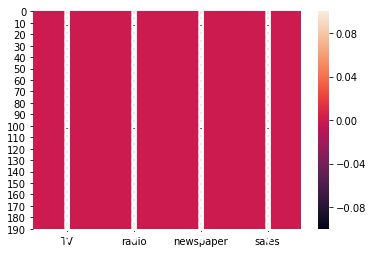

In [11]:
sns.heatmap(df_sales.isnull(),annot=True)

In [12]:
df_sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

CHECKING DATA SKEWNESS

In [13]:
for col in df_sales.columns:
    if df_sales.skew().loc[col]>0.55:
        df_sales[col]=np.log1p(df_sales[col])
df_sales.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

CHECKING OUTLIERS

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df_sales))
print(z.shape)
print(np.where(z>3))

(200, 4)
(array([33], dtype=int64), array([2], dtype=int64))


In [15]:
print(df_sales.iloc[33,])

TV           265.600000
radio         20.000000
newspaper      0.262364
sales         17.400000
Name: 33, dtype: float64


This outlier may be ignored.

In [16]:
df_final=df_sales

CORRELATION

In [17]:
df_final.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.030951,0.782224
radio,0.054809,1.000000,0.251909,0.576223
newspaper,0.030951,0.251909,1.000000,0.164501
sales,0.782224,0.576223,0.164501,1.000000


In [18]:
df_final.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

# DATAFRAME

In [19]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

        TV  radio  newspaper
0    230.1   37.8   4.251348
1     44.5   39.3   3.830813
2     17.2   45.9   4.252772
3    151.5   41.3   4.085976
4    180.8   10.8   4.084294
..     ...    ...        ...
195   38.2    3.7   2.694627
196   94.2    4.9   2.208274
197  177.0    9.3   2.001480
198  283.6   42.0   4.207673
199  232.1    8.6   2.272126

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

(200, 3)
(200,)


In [20]:
x=df_x

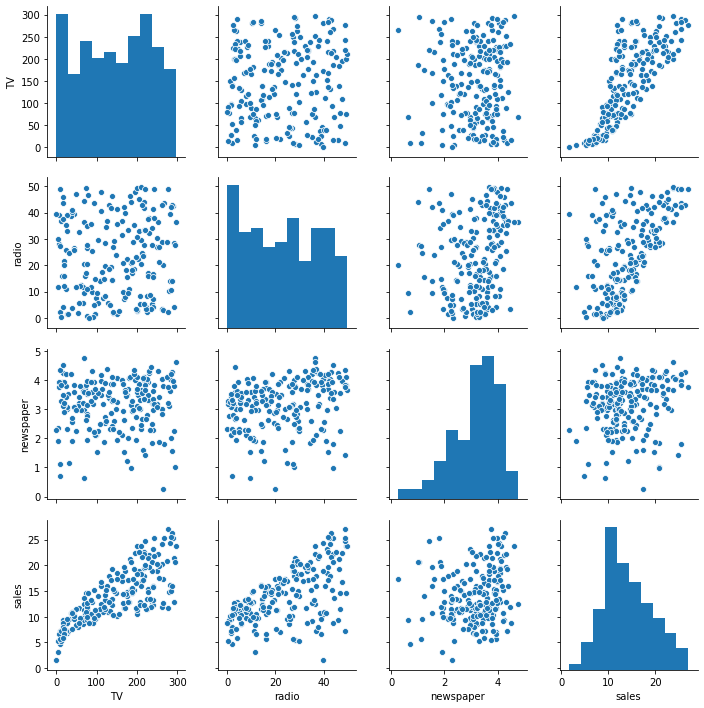

In [21]:
sns.pairplot(df_final)

# TRAINING AND TESTING - VARIOUS MODELS

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

FUNCTION DECLARATION

In [23]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.8996743470591734
R2 Score corresponding to  43  is  0.9278006427530694
R2 Score corresponding to  44  is  0.8307354623475127
R2 Score corresponding to  45  is  0.8951874656511892
R2 Score corresponding to  46  is  0.8502747923160441
R2 Score corresponding to  47  is  0.8861535196315131
R2 Score corresponding to  48  is  0.9199526417276469
R2 Score corresponding to  49  is  0.8249642083513499
R2 Score corresponding to  50  is  0.8469693454551068
R2 Score corresponding to  51  is  0.9049819936668557
R2 Score corresponding to  52  is  0.8813753894105311
R2 Score corresponding to  53  is  0.9256875638861686
R2 Score corresponding to  54  is  0.9182888279066231
R2 Score corresponding to  55  is  0.9038303226842745
R2 Score corresponding to  56  is  0.8895696209473444
R2 Score corresponding to  57  is  0.9412101362997594
R2 Score corresponding to  58  is  0.8406697298254625
R2 Score corresponding to  59  is  0.9251717743473579
R2 Score corresponding to  6

In [25]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.8859185174991563
Standard Deviation in R2 Score for Linear Regression is  0.052038274360016276


KNEIGHBORS REGRESSOR

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 3}

In [27]:
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.9727006159852547
R2 Score corresponding to  43  is  0.9629275483402363
R2 Score corresponding to  44  is  0.9162285540595307
R2 Score corresponding to  45  is  0.9483852326393578
R2 Score corresponding to  46  is  0.9534315429034935
R2 Score corresponding to  47  is  0.9670642534580132
R2 Score corresponding to  48  is  0.9695352866320163
R2 Score corresponding to  49  is  0.9509874210401206
R2 Score corresponding to  50  is  0.9532955428937098
R2 Score corresponding to  51  is  0.9564349229126627
R2 Score corresponding to  52  is  0.9650797434327518
R2 Score corresponding to  53  is  0.9790566285719587
R2 Score corresponding to  54  is  0.9687215697191763
R2 Score corresponding to  55  is  0.9621472514943892
R2 Score corresponding to  56  is  0.9703495491849609
R2 Score corresponding to  57  is  0.961978985976665
R2 Score corresponding to  58  is  0.9583095007918982
R2 Score corresponding to  59  is  0.9731401900207539
R2 Score corresponding to  60

In [28]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=10,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.9620765050266311
Standard Deviation in R2 Score for KNN Regression is  0.014049408190840561


LASSO REGRESSION

In [29]:
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [30]:
ls=Lasso(alpha=0.1)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.9006342487124841
R2 Score corresponding to  43  is  0.9285048530794857
R2 Score corresponding to  44  is  0.8311816716527916
R2 Score corresponding to  45  is  0.8985188597068807
R2 Score corresponding to  46  is  0.8534392432347682
R2 Score corresponding to  47  is  0.8860945492399546
R2 Score corresponding to  48  is  0.9202286516592186
R2 Score corresponding to  49  is  0.825528329793284
R2 Score corresponding to  50  is  0.8517580769022559
R2 Score corresponding to  51  is  0.9079164322338624
R2 Score corresponding to  52  is  0.8830081542110533
R2 Score corresponding to  53  is  0.9255806538314634
R2 Score corresponding to  54  is  0.9182392811133391
R2 Score corresponding to  55  is  0.9067905171609926
R2 Score corresponding to  56  is  0.8895002588169769
R2 Score corresponding to  57  is  0.9414751378851532
R2 Score corresponding to  58  is  0.8407163848528237
R2 Score corresponding to  59  is  0.9249808317364414
R2 Score corresponding to  60

In [31]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.8892843289533665
Standard Deviation in R2 Score for Lasso Regression is  0.03768017769770806


RIDGE REGRESSION

In [32]:
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [33]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.8996870313810141
R2 Score corresponding to  43  is  0.9278085208260827
R2 Score corresponding to  44  is  0.8307397637220755
R2 Score corresponding to  45  is  0.8952203514881625
R2 Score corresponding to  46  is  0.8503055272203818
R2 Score corresponding to  47  is  0.8861534437526013
R2 Score corresponding to  48  is  0.9199552092908552
R2 Score corresponding to  49  is  0.8249704969022288
R2 Score corresponding to  50  is  0.847014025486959
R2 Score corresponding to  51  is  0.9050147216881842
R2 Score corresponding to  52  is  0.8813912399073488
R2 Score corresponding to  53  is  0.9256866992129503
R2 Score corresponding to  54  is  0.9182883134290646
R2 Score corresponding to  55  is  0.9038596083062195
R2 Score corresponding to  56  is  0.8895694133414119
R2 Score corresponding to  57  is  0.9412131724136369
R2 Score corresponding to  58  is  0.8406707244472749
R2 Score corresponding to  59  is  0.925169821650778
R2 Score corresponding to  60 

In [34]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.8878358703003292
Standard Deviation in R2 Score for Ridge Regression is  0.03921308406859007


ELASTIC NET REGRESSION

In [35]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [36]:
enr=ElasticNet(alpha=1)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.9008651979619743
R2 Score corresponding to  43  is  0.9281328440899317
R2 Score corresponding to  44  is  0.8306957018254346
R2 Score corresponding to  45  is  0.8970807282398718
R2 Score corresponding to  46  is  0.8538570820738893
R2 Score corresponding to  47  is  0.8861523539126819
R2 Score corresponding to  48  is  0.9199742826895415
R2 Score corresponding to  49  is  0.8269555572603635
R2 Score corresponding to  50  is  0.8522384946941736
R2 Score corresponding to  51  is  0.9062861272469005
R2 Score corresponding to  52  is  0.8837795183144087
R2 Score corresponding to  53  is  0.9250480287159948
R2 Score corresponding to  54  is  0.9175786981215053
R2 Score corresponding to  55  is  0.9075076713038289
R2 Score corresponding to  56  is  0.8896251022141355
R2 Score corresponding to  57  is  0.9414094785574106
R2 Score corresponding to  58  is  0.8410203171399109
R2 Score corresponding to  59  is  0.9244360227578198
R2 Score corresponding to  6

In [37]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.8892438945462988
Standard Deviation in R2 Score for Elastic Net Regression is  0.037278740405920226


GRADIENT BOOSTING REGRESSOR

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [39]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.9834005309961641
R2 Score corresponding to  43  is  0.988117454484719
R2 Score corresponding to  44  is  0.9583415439104074
R2 Score corresponding to  45  is  0.9771722433547484
R2 Score corresponding to  46  is  0.9798925943721816
R2 Score corresponding to  47  is  0.9846575011576746
R2 Score corresponding to  48  is  0.9908137897629343
R2 Score corresponding to  49  is  0.9720333889890358
R2 Score corresponding to  50  is  0.9829953697910263
R2 Score corresponding to  51  is  0.9841582815462467
R2 Score corresponding to  52  is  0.9785667311702381
R2 Score corresponding to  53  is  0.9795147871716187
R2 Score corresponding to  54  is  0.982665512317183
R2 Score corresponding to  55  is  0.9842595867919022
R2 Score corresponding to  56  is  0.9760058015366303
R2 Score corresponding to  57  is  0.9872688263991339
R2 Score corresponding to  58  is  0.9724666609737087
R2 Score corresponding to  59  is  0.9883793435198382
R2 Score corresponding to  60 

In [40]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.9781941748875707
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.008585510731668052


ADA BOOST REGRESSOR

In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
abr=AdaBoostRegressor()
dtr=DecisionTreeRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,ls,dtr]}
clf=GridSearchCV(abr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 1000}

In [43]:
abr=AdaBoostRegressor(base_estimator=dtr,learning_rate=1,n_estimators=1000)
r_state=maxr2_score(abr,x,y)

R2 Score corresponding to  42  is  0.9771889092952224
R2 Score corresponding to  43  is  0.9830386151589445
R2 Score corresponding to  44  is  0.9463429324086999
R2 Score corresponding to  45  is  0.9730467497185381
R2 Score corresponding to  46  is  0.9679268918766926
R2 Score corresponding to  47  is  0.9790943748834481
R2 Score corresponding to  48  is  0.9719970332551401
R2 Score corresponding to  49  is  0.9710593651990471
R2 Score corresponding to  50  is  0.9742587991536659
R2 Score corresponding to  51  is  0.9757626480857852
R2 Score corresponding to  52  is  0.9725933400673299
R2 Score corresponding to  53  is  0.9817199239064303
R2 Score corresponding to  54  is  0.9773680465166618
R2 Score corresponding to  55  is  0.9700134740780384
R2 Score corresponding to  56  is  0.9674248832170897
R2 Score corresponding to  57  is  0.9811800969547371
R2 Score corresponding to  58  is  0.9650092096499325
R2 Score corresponding to  59  is  0.981014069619509
R2 Score corresponding to  60

In [44]:
print("Mean R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for ADA Boost Regressor is  0.9736784371286588
Standard Deviation in R2 Score for ADA Boost Regressor is  0.006625058365087769


# BEST MODEL

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.9895661327259082
RMSE is  0.5499608572811082


I will use Gradient Boost Regressor for this dataset.

# PICKLE

In [46]:
from sklearn.externals import joblib
joblib.dump(gbr,'sales.pkl')

['sales.pkl']